#Section 1 : Regression


##Boston Housing Price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/boston.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
dataset.shape

(506, 14)

In [ ]:
dataset.isnull().sum() # return number of missing values for each variable

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MDEV       0
dtype: int64

In [ ]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Histogram of Price')

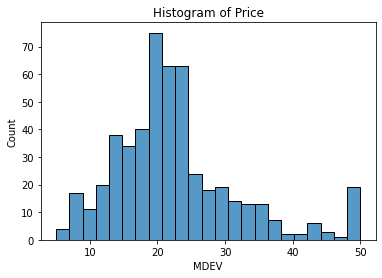

In [ ]:
#histogram of price
sns.histplot(dataset['MDEV'])
plt.title("Histogram of Price")

###Correlation Matrix

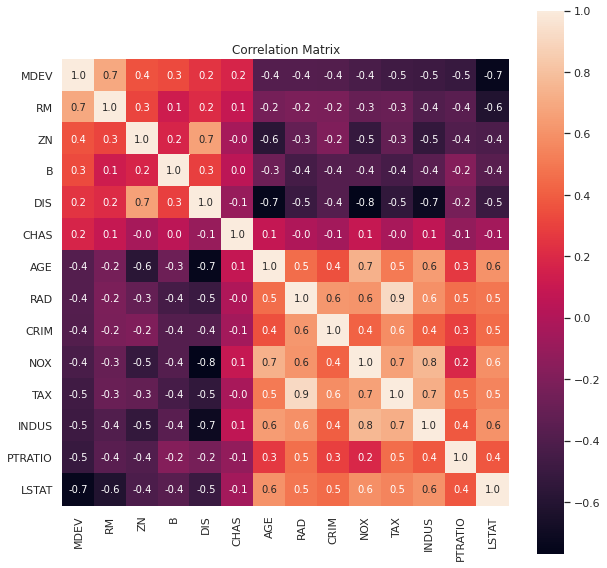

In [ ]:
#price correlation matrix
correlation_matrix = dataset.corr()
k = 14 #number of variables for heatmap
cols = correlation_matrix.nlargest(k,'MDEV')['MDEV'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.01f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(correlation_matrix['MDEV'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MDEV       1.000000
Name: MDEV, dtype: float64

we should check the correlation between theses features in order to have independent features.

In [ ]:
print(dataset[["LSTAT","PTRATIO"]].corr())
print(dataset[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


We find out that LSTAT and RM are highly correlated, so we keep one of them that highly correlated with MDEV.

In [ ]:
print(dataset[["RM","MDEV"]].corr())
print(dataset[["MDEV","LSTAT"]].corr())

           RM     MDEV
RM    1.00000  0.69536
MDEV  0.69536  1.00000
           MDEV     LSTAT
MDEV   1.000000 -0.737663
LSTAT -0.737663  1.000000


We keep LSTAT, because it's highly correlated with MDEV.
and we should drop irrelavent columns.

In [ ]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MDEV'],
      dtype='object')

In [ ]:
dataset.drop(labels=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','B'], axis=1, inplace=True) # remove irrelavent columns features
dataset.head()

,PTRATIO,LSTAT,MDEV
0,15.3,4.98,24.0
1,17.8,9.14,21.6
2,17.8,4.03,34.7
3,18.7,2.94,33.4
4,18.7,5.33,36.2


In [ ]:
dataset.describe()

,PTRATIO,LSTAT,MDEV
count,506.000000,506.000000,506.000000
mean,18.455534,12.653063,22.532806
std,2.164946,7.141062,9.197104
min,12.600000,1.730000,5.000000
25%,17.400000,6.950000,17.025000
50%,19.050000,11.360000,21.200000
75%,20.200000,16.955000,25.000000
max,22.000000,37.970000,50.000000


Text(0.5, 1.0, 'Box Plot for each feature')

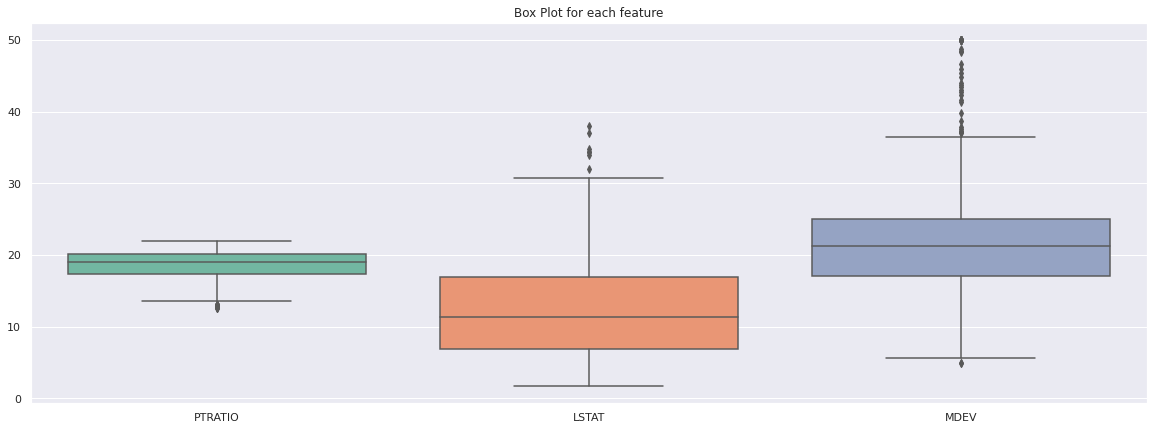

In [ ]:
fig = plt.figure(figsize =(20, 7))
# Creating plot
ax = sns.boxplot(data=dataset, orient="v", palette="Set2")
plt.title("Box Plot for each feature")

LSTAT and MDEv have outlier data

In [ ]:
# replace outlier data with median value for each feature
print(dataset['MDEV'].quantile(0.50)) 
print(dataset['MDEV'].quantile(0.95)) 

21.2
43.4


In [ ]:
dataset['MDEV'] = np.where(dataset['MDEV'] > 43.4, 21.2, dataset['MDEV'])


In [ ]:
dataset.describe()

,PTRATIO,LSTAT,MDEV
count,506.000000,506.000000,506.000000
mean,18.455534,12.653063,21.132411
std,2.164946,7.141062,6.917412
min,12.600000,1.730000,5.000000
25%,17.400000,6.950000,17.025000
50%,19.050000,11.360000,21.200000
75%,20.200000,16.955000,24.100000
max,22.000000,37.970000,43.100000


In [ ]:
# replace outlier data with median value for each feature
dataset['LSTAT'] = np.where(dataset['LSTAT'] >dataset['LSTAT'].quantile(0.95) , dataset['LSTAT'].quantile(0.50), dataset['LSTAT'])

In [ ]:
dataset.describe()

,PTRATIO,LSTAT,MDEV
count,506.000000,506.000000,506.000000
mean,18.455534,11.658636,21.132411
std,2.164946,5.731624,6.917412
min,12.600000,1.730000,5.000000
25%,17.400000,6.950000,17.025000
50%,19.050000,11.350000,21.200000
75%,20.200000,15.510000,24.100000
max,22.000000,26.770000,43.100000


Text(0.5, 1.0, 'Box Plot for each feature')

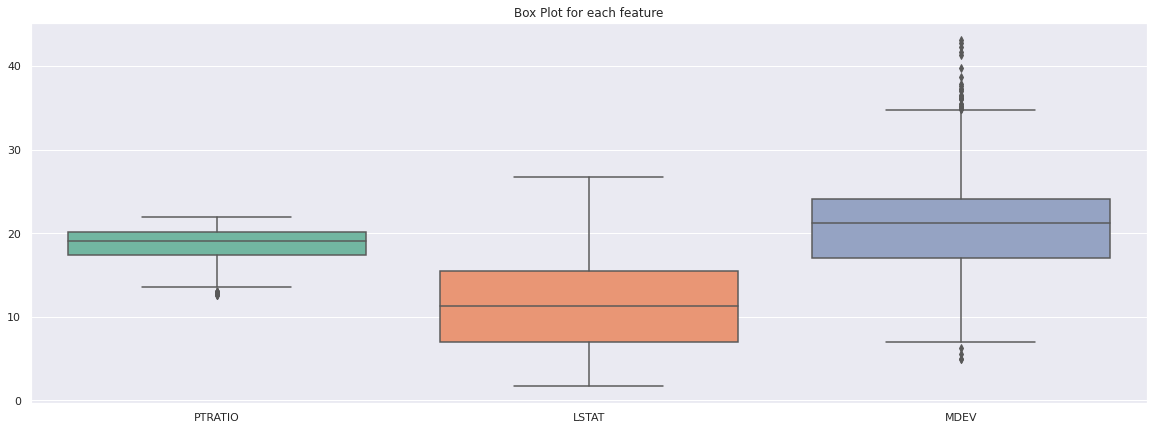

In [ ]:
fig = plt.figure(figsize =(20, 7))
# Creating plot
ax = sns.boxplot(data=dataset, orient="v", palette="Set2")
plt.title("Box Plot for each feature")

In [ ]:
features = dataset.drop(columns='MDEV')
targets = pd.DataFrame(dataset['MDEV'])

In [ ]:
print(features.shape)
print(targets.shape)

(506, 2)
(506, 1)


Both of these two features have negative correlation with MDEV, so as these features increase, the amount of MDEV decreases

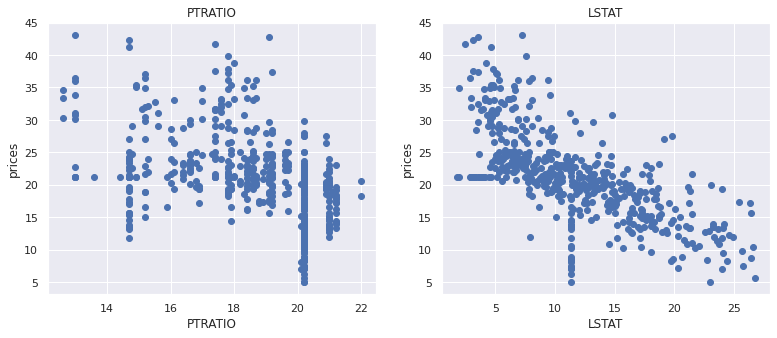

In [ ]:
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = dataset[col]
    y = targets
    plt.plot(x, y, 'o')
    # Create regression line
    # plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) ///?
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [ ]:
(X_trainh ,X_testh, y_trainh, y_testh) = train_test_split(features, targets, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
print("X_train : ",X_trainh.shape)
print("X_test : ",X_testh.shape)
print("y_train : ",y_trainh.shape)
print("y_test : ",y_testh.shape)
print("type of X_train : ",type(X_trainh))

X_train :  (404, 2)
X_test :  (102, 2)
y_train :  (404, 1)
y_test :  (102, 1)
type of X_train :  <class 'pandas.core.frame.DataFrame'>


###Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainh = sc.fit_transform(X_trainh)
X_testh = sc.transform(X_testh)

##Linear Regression using sk-learn

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_trainh, y_trainh)

In [ ]:
reg.score(X_trainh, y_trainh)

0.45839421128876634

In [ ]:
reg.coef_

array([[-1.29956974, -3.91559932]])

In [ ]:
y_testh_predict = reg.predict(X_testh)
type(y_testh_predict)

numpy.ndarray

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_testh,y_testh_predict))

Mean squared error: 20.23


In [ ]:
print(reg.score(X_testh, y_testh))

0.24764334419202727


#Section 2: Classification

##Pima Indians Diabetes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI-Internship/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


My hypothesis : All of the features has effect on diabetes. for example if the amount of Insulin decreases it can not control the diabetes ,so the probability of diabetes increases.

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


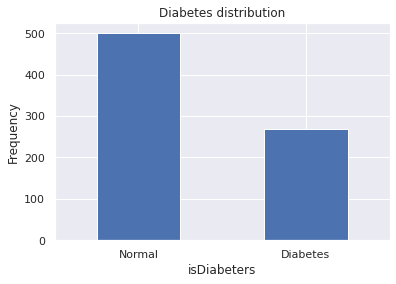

In [ ]:
# diabetes distribution in df
LABELS = ["Normal", "Diabetes"]

count_classes = df.value_counts(df['Outcome'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Diabetes distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("isDiabeters")
plt.ylabel("Frequency");

Text(0.5, 1.0, 'Box Plot for each feature')

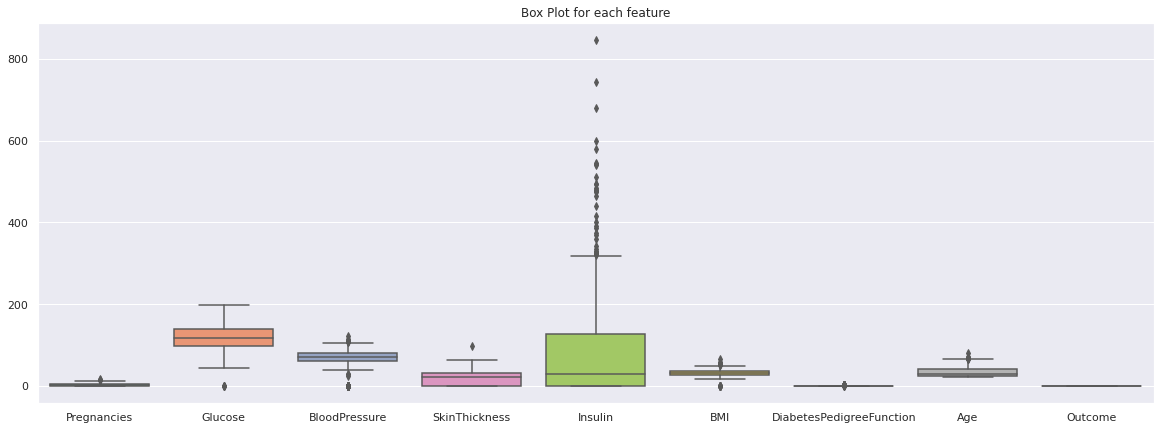

In [ ]:
fig = plt.figure(figsize =(20, 7))
# Creating plot
ax = sns.boxplot(data=df, orient="v", palette="Set2")
plt.title("Box Plot for each feature")


Insulin has many outlier data

In [ ]:
# replace outlier data with median value for each feature
print(df['Insulin'].quantile(0.50)) 
print(df['Insulin'].quantile(0.95)) 

30.5
293.0


In [ ]:
df['Insulin'] = np.where(df['Insulin'] > 293, 30.5, df['Insulin'])
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,59.473958,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,75.573893,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.750000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,106.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,293.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Box Plot for each feature')

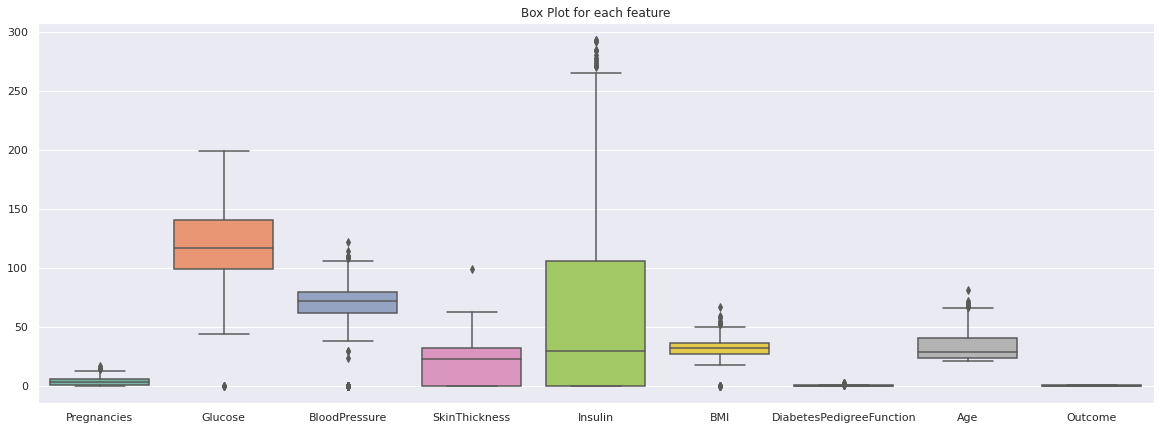

In [ ]:
fig = plt.figure(figsize =(20, 7))
# Creating plot
ax = sns.boxplot(data=df, orient="v", palette="Set2")
plt.title("Box Plot for each feature")

###Correlation Matrix

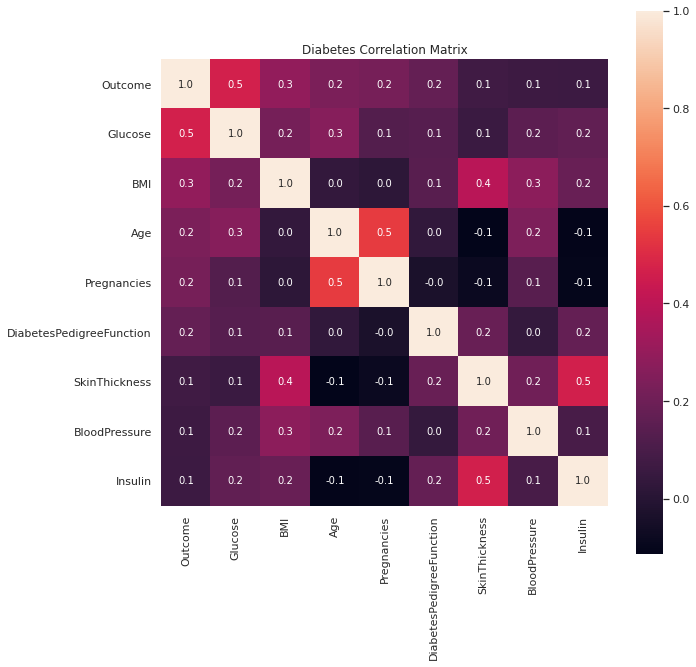

In [ ]:
#Diabetes correlation matrix
correlation_matrix = df.corr()
k = 9 #number of variables for heatmap
cols = correlation_matrix.nlargest(k,'Outcome')['Outcome'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.01f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.title("Diabetes Correlation Matrix")
plt.show()

###Feature Selection

In [ ]:
# Correlation with output varibale
cor_target = abs(correlation_matrix["Outcome"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.2]
relevant_features

Pregnancies    0.221898
Glucose        0.466581
BMI            0.292695
Age            0.238356
Outcome        1.000000
Name: Outcome, dtype: float64

In [ ]:
print(df[["Pregnancies","Glucose"]].corr())

print(df[["BMI","Age"]].corr())

print(df[["Pregnancies","Age"]].corr())# highly correlated

             Pregnancies   Glucose
Pregnancies     1.000000  0.129459
Glucose         0.129459  1.000000
          BMI       Age
BMI  1.000000  0.036242
Age  0.036242  1.000000
             Pregnancies       Age
Pregnancies     1.000000  0.544341
Age             0.544341  1.000000


Age is more correlated with Outcome than pregnancies.

In [ ]:
print(df[["Outcome","Age"]].corr())

print(df[["Outcome","Pregnancies"]].corr())

          Outcome       Age
Outcome  1.000000  0.238356
Age      0.238356  1.000000
              Outcome  Pregnancies
Outcome      1.000000     0.221898
Pregnancies  0.221898     1.000000


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.drop(labels= ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'], axis=1, inplace=True) # remove irrelavent columns features
df.head()

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [ ]:
features = df.drop(columns='Outcome')
targets = pd.DataFrame(df['Outcome'])

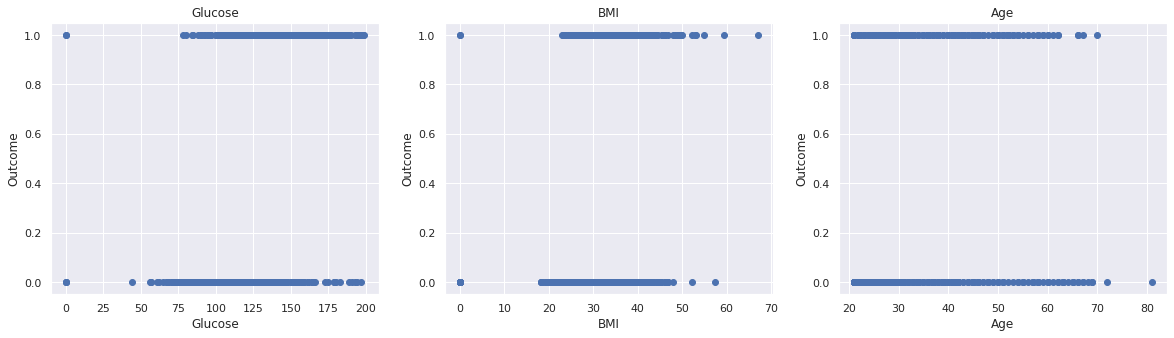

In [ ]:
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = df[col]
    y = targets
    plt.plot(x, y, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Outcome')

In [ ]:
# split train and test dataset
(X_train ,X_test, y_train, y_test) = train_test_split(features, targets, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)
print("type of X_train : ",type(X_train))

X_train :  (614, 3)
X_test :  (154, 3)
y_train :  (614, 1)
y_test :  (154, 1)
type of X_train :  <class 'pandas.core.frame.DataFrame'>


###Standardization

In [ ]:
# set mean of all the feature to 0 and std to 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Model training : Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_test_predict = clf.predict(X_test)

In [ ]:
clf.score(X_test,y_test) # = accuary

0.7792207792207793

###Confusion Matrix

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_predict)
print(cnf_matrix)

[[89 10]
 [24 31]]



TP = 89 | FP = 10|
FN = 24 | TN = 31

it's faslely predicted taht 24 person don't have diabetes

Text(0.5, 257.44, 'Predicted label')

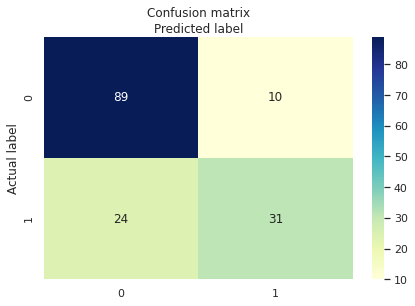

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_predict))
print("Precision:",metrics.precision_score(y_test, y_test_predict))
print("Recall:",metrics.recall_score(y_test, y_test_predict))

Accuracy: 0.7792207792207793
Precision: 0.7560975609756098
Recall: 0.5636363636363636


## KNN classification model for diabetes data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh_clf = KNeighborsClassifier(n_neighbors=3)
neigh_clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred_nclf = neigh_clf.predict(X_test)

In [ ]:
neigh_clf.score(X_test,y_test) # = accuary

0.7207792207792207

In [ ]:
cnf_matrix_nclf = metrics.confusion_matrix(y_test, y_pred_nclf)
print(cnf_matrix_nclf)

[[75 24]
 [19 36]]


Text(0.5, 257.44, 'Predicted label')

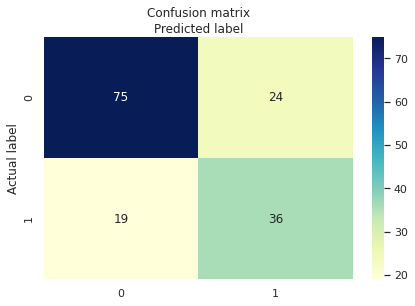

In [ ]:
ass_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nclf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nclf))
print("Precision:",metrics.precision_score(y_test, y_pred_nclf))
print("Recall:",metrics.recall_score(y_test, y_pred_nclf))

Accuracy: 0.7207792207792207
Precision: 0.6
Recall: 0.6545454545454545


It seems that logistic regresstion has better performance on this dataset than KNN classifier, because it has better accuarcy and precision.

We try with another KNN model with k = 15

In [ ]:
neigh_clf2 = KNeighborsClassifier(n_neighbors=15)
neigh_clf2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
y_pred_nclf2 = neigh_clf2.predict(X_test)

In [ ]:
cnf_matrix_nclf2 = metrics.confusion_matrix(y_test, y_pred_nclf2)
print(cnf_matrix_nclf2)

[[82 17]
 [23 32]]


Text(0.5, 257.44, 'Predicted label')

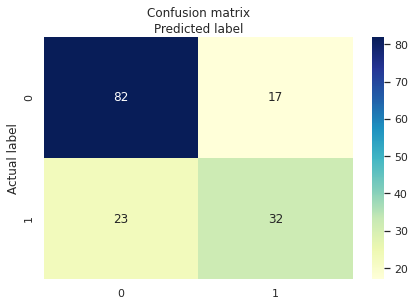

In [ ]:
ass_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nclf2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nclf2))
print("Precision:",metrics.precision_score(y_test, y_pred_nclf2))
print("Recall:",metrics.recall_score(y_test, y_pred_nclf2))

Accuracy: 0.7402597402597403
Precision: 0.6530612244897959
Recall: 0.5818181818181818


As we increase the amount of K in KNN, the accuracy and precision increased, but logistic regression model has better performance.

##KNN regression model for housing price data

In [ ]:
>>> from sklearn.neighbors import KNeighborsRegressor
>>> neigh_reg = KNeighborsRegressor(n_neighbors=15)
>>> neigh_reg.fit(X_trainh, y_trainh)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

In [ ]:
y_pred_nreg = neigh_reg.predict(X_testh)

In [ ]:
neigh_reg.score(X_testh,y_testh) # = accuary

0.2579537691134288

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_testh,y_pred_nreg))

Mean squared error: 19.95


Due to the low amount of accuracy, this model is not good. one possibility reason is overfitting.

##SVM regression model on housing price data

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel = 'rbf')
svr_rbf.fit(X_trainh, y_trainh)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_svrrbf = svr_rbf.predict(X_testh)

In [ ]:
svr_rbf.score(X_testh,y_testh) # = accuary

0.24251068531771344

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_testh,y_pred_svrrbf))

Mean squared error: 20.37


Try SVR with another kernel.

In [ ]:
svr_lin = SVR(kernel = 'linear')
svr_lin.fit(X_trainh, y_trainh)
y_pred_svrlin = svr_lin.predict(X_testh)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svr_lin.score(X_testh,y_testh) # = accuary

0.25216904243127225

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_testh,y_pred_svrlin))

Mean squared error: 20.11


With linear kernel we have low accuracy because of we have 3 dimensional space and our data is not linear spratable. so for this data svr with rbf kernel is better.

##SVM classification model on diabetes data

In [ ]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf')
svc_rbf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svcrbf =svc_rbf.predict(X_test)

In [ ]:
svc_rbf.score(X_test,y_test) # = accuary

0.7597402597402597

Text(0.5, 257.44, 'Predicted label')

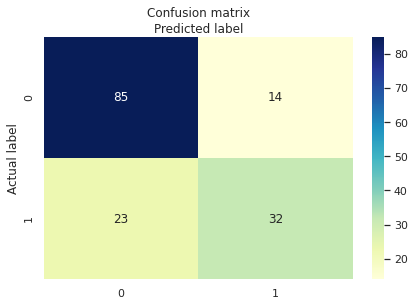

In [ ]:
from sklearn import metrics
cnf_matrix_svcrbf = metrics.confusion_matrix(y_test, y_pred_svcrbf)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svcrbf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svcrbf))
print("Precision:",metrics.precision_score(y_test, y_pred_svcrbf))
print("Recall:",metrics.recall_score(y_test, y_pred_svcrbf))

Accuracy: 0.7597402597402597
Precision: 0.6956521739130435
Recall: 0.5818181818181818


Try with linear kernel.

In [ ]:
svc_lin = SVC(kernel = 'linear')
svc_lin.fit(X_train, y_train)
y_pred_svclin = svc_lin.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 257.44, 'Predicted label')

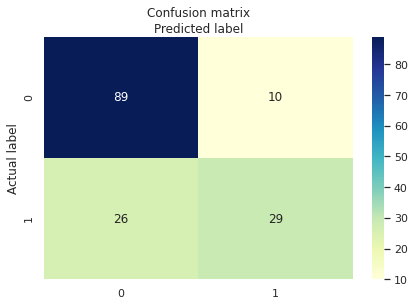

In [ ]:
from sklearn import metrics
cnf_matrix_svclin = metrics.confusion_matrix(y_test, y_pred_svclin)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svclin), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svclin))
print("Precision:",metrics.precision_score(y_test, y_pred_svclin))
print("Recall:",metrics.recall_score(y_test, y_pred_svclin))

Accuracy: 0.7662337662337663
Precision: 0.7435897435897436
Recall: 0.5272727272727272


##Desition Tree classification on diabetes data

In [ ]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred_dtclf =dt_clf.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

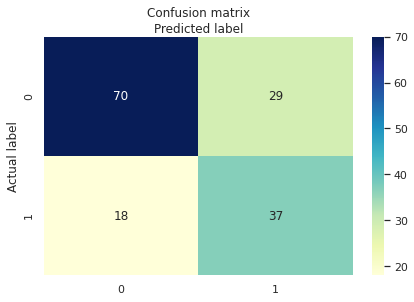

In [ ]:
from sklearn import metrics
cnf_matrix_dtclf = metrics.confusion_matrix(y_test, y_pred_dtclf)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dtclf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtclf))
print("Precision:",metrics.precision_score(y_test, y_pred_dtclf))
print("Recall:",metrics.recall_score(y_test, y_pred_dtclf))

Accuracy: 0.6948051948051948
Precision: 0.5606060606060606
Recall: 0.6727272727272727


Change hyperparameters.

In [ ]:
dt_clf2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt_clf2.fit(X_train,y_train)
y_pred_dtclf2 =dt_clf2.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

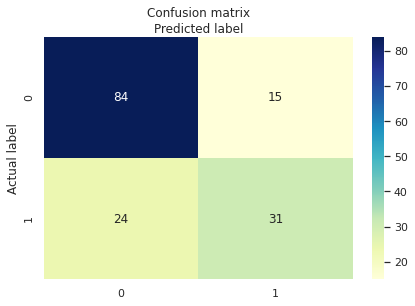

In [ ]:
from sklearn import metrics
cnf_matrix_dtclf2 = metrics.confusion_matrix(y_test, y_pred_dtclf2)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dtclf2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtclf2))
print("Precision:",metrics.precision_score(y_test, y_pred_dtclf2))
print("Recall:",metrics.recall_score(y_test, y_pred_dtclf2))

Accuracy: 0.7467532467532467
Precision: 0.6739130434782609
Recall: 0.5636363636363636


The second decisiton tree classifier has better performance, because we set the depth and overfitting does not occur.

##Desition Tree regression on house data

In [ ]:
dt_reg = tree.DecisionTreeRegressor()
dt_reg.fit(X_trainh,y_trainh)
y_pred_dtreg =dt_reg.predict(X_testh)

In [ ]:
dt_reg.score(X_testh,y_testh) # = accuary

0.18836236476550972

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_testh,y_pred_dtreg))

Mean squared error: 21.82


#Section 3: Clustering

##Gene expression cancer RNA-Seq Data Set

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/AI-Internship/TCGA-PANCAN-HiSeq-801x20531/TCGA-PANCAN-HiSeq-801x20531/data.csv')
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,0.0,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.0,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.0,9.833458,...,9.370304,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.0,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,0.0,0.0,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.0,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.0,9.533302,...,8.882967,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.0,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,0.0,0.0,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.0,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.0,9.646323,...,10.355637,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.0,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,0.0,0.0,0.0,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.0,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.0,9.670731,...,10.074382,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.0,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,0.0,0.0,0.0,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.0,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.0,9.587569,...,10.129154,10.062303,6.911620,7.855149,0.360982,3.655810,7.255520,7.292607,10.779793,3.954001,6.991148,8.153248,7.508444,4.586531,9.152227,8.227717,0.360982,6.227104,0.649386,8.151879,0.0,6.558289,8.673708,6.505099,8.948989,7.010366,7.364056,8.950646,8.233366,9

In [5]:
data.shape

(801, 20532)

As we see, we have too many features. so we should use dementionality reduction techniques like PCA to give relevant axis.

In [11]:
labels = pd.read_csv('/content/drive/MyDrive/AI-Internship/TCGA-PANCAN-HiSeq-801x20531/TCGA-PANCAN-HiSeq-801x20531/labels.csv')
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [12]:
labels.shape

(801, 2)

In [16]:
# number of data in each classes
labels['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [21]:
# remove irrelevant columns
# each data has one value in "Unnamed: 0" cloumn, so it does not have effect on result/
labels = labels.drop(columns='Unnamed: 0')
data = data.drop(columns='Unnamed: 0')

In [22]:
print(data.shape)
print(labels.shape)

(801, 20531)
(801, 1)


Check for missing values in data and labels. As we see, we don't have missing value.

In [24]:
data.isnull().sum().sum()

0

In [31]:
labels.isnull().sum().sum()

0

Check for categorical data. If we have categorical data we shoudl treat them with onehotencoder and something like that.



In [26]:
catergory = data.select_dtypes(include=['category']) 
catergory.head()

""
0
1
2
3
4


All of our features are numerical.

In [28]:
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,0.688177,0.955504,2.667291,0.318108,0.214608,0.005879,0.003002,0.035498,2.204436,9.078900,3.286125,2.556424,8.266450,0.0,0.105504,0.526534,2.722476,9.209380,4.673866,6.182851,2.139337,1.168574,6.789898,2.284279,13.711217,8.545217,1.123570,0.202338,9.497384,1.363294,...,9.793412,10.284857,6.079328,7.945613,0.371288,4.905456,7.366911,7.049196,9.628212,2.354619,5.796625,7.744818,6.825166,3.859964,8.791191,8.045218,1.051505,6.031472,1.217945,8.147243,0.044261,6.856778,8.517432,7.347510,8.561671,8.021405,7.314292,8.687859,8.324222,8.788809,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,1.173568,0.877319,0.705767,0.673289,0.396474,0.065316,0.038493,0.192218,3.194977,1.203502,1.137231,2.448633,1.220976,0.0,0.411554,0.703966,2.667242,0.740969,2.049775,1.568571,3.160784,1.665570,0.857483,2.721062,1.272811,1.380301,1.369473,0.609529,0.425283,1.882621,...,0.503487,0.458172,0.811543,0.617257,0.757676,1.075023,0.809643,0.714542,1.376309,1.877525,0.893885,0.490483,0.485472,1.832004,0.524364,0.601594,1.264554,0.643518,0.697974,0.514244,0.175399,0.608048,0.743320,1.505049,0.636755,0.644683,0.576918,0.542212,0.823877,1.265211,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.437228,0.000000,0.000000,4.190164,0.0,0.000000,0.000000,0.000000,6.200934,0.000000,2.203890,0.000000,0.000000,4.238290,0.000000,9.378178,4.094641,0.000000,0.000000,7.191099,0.000000,...,8.113831,8.897349,2.583086,5.264987,0.000000,1.573908,4.253021,4.640604,4.383186,0.000000,1.066881,5.304664,5.124647,0.000000,6.729838,4.322945,0.000000,3.488194,0.000000,6.355971,0.000000,4.686904,5.555325,0.000000,5.709908,4.567479,0.000000,6.655299,6.294446,4.077841,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,0.000000,0.395831,2.243852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.286530,2.589260,0.000000,7.611490

As we saw in above data, we have many features and if we use all of them we face with overfitting. so we should use some relevant and important features. As each feature has different std, we should first Standard them then use pca for dimentionality reduction.

In [41]:
(X_traing ,X_testg, y_traing, y_testg) = train_test_split(data,labels, test_size=0.2, random_state=42, shuffle=False)

In [42]:
print("X_train : ",X_traing.shape)
print("X_test : ",X_testg.shape)
print("y_train : ",y_traing.shape)
print("y_test : ",y_testg.shape)
print("type of X_train : ",type(X_traing))

X_train :  (640, 20531)
X_test :  (161, 20531)
y_train :  (640, 1)
y_test :  (161, 1)
type of X_train :  <class 'pandas.core.frame.DataFrame'>


###Standardization

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_traing = sc.fit_transform(X_traing)
X_testg = sc.transform(X_testg)

###Dimensionality Reduction (PCA)

In [34]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

First use pca without determine number of features.

In [44]:
pca = PCA()
pca.fit_transform(X_traing)

array([[-5.84690061e+01,  1.04817901e+02,  6.02418970e+01, ...,
        -1.01096780e-02,  1.10782488e-01,  4.08721733e-15],
       [-1.75773207e+01, -1.17580205e+01, -6.12895805e+01, ...,
        -2.14041901e-01,  7.79000114e-01,  4.08721733e-15],
       [-6.68645770e+01, -1.78138666e+01,  2.46928157e+01, ...,
         1.49860634e-01, -3.86631194e-02,  4.08721733e-15],
       ...,
       [-3.17396525e+01,  3.23140680e+01, -3.84805242e+01, ...,
        -3.64001018e-01, -4.78873301e-01,  4.08721733e-15],
       [-3.45980704e+00, -6.65891066e+01,  1.10661615e+01, ...,
        -4.80872935e-01, -4.35207479e-01,  4.08721733e-15],
       [-3.71038051e+01, -6.91829779e+01, -3.75311160e+01, ...,
        -8.23524125e-02, -4.39605513e-01,  4.08721733e-15]])

In [50]:
pca.explained_variance_.shape

(640,)

In [58]:
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.80:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " features explain around 80% of the variance. From 7129 features to ", k, ", not too bad.", sep='')

160 features explain around 80% of the variance. From 7129 features to 160, not too bad.


In [61]:
pca = PCA(n_components=k).fit(X_traing)

X_train_pca = pca.transform(X_traing)
X_test_pca = pca.transform(X_testg)

In [63]:
X_train_pca.shape

(640, 160)

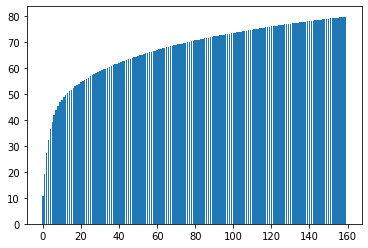

In [64]:
var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

##KMeans model

In [67]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train_pca)
y_pred_km = kmeans.predict(X_test_pca)

In [70]:
kmeans.labels_ #result on training set

array([4, 1, 4, 4, 3, 4, 0, 4, 3, 4, 3, 0, 4, 1, 3, 3, 1, 0, 0, 4, 3, 0,
       1, 3, 0, 1, 2, 3, 3, 3, 3, 3, 0, 1, 4, 3, 0, 1, 3, 1, 0, 4, 4, 0,
       0, 3, 4, 2, 3, 1, 3, 1, 3, 4, 2, 1, 3, 2, 0, 3, 1, 3, 3, 1, 4, 2,
       3, 4, 0, 1, 0, 3, 1, 1, 3, 1, 3, 1, 4, 2, 3, 4, 3, 3, 4, 4, 3, 3,
       0, 1, 4, 4, 3, 1, 3, 4, 2, 3, 4, 3, 3, 0, 3, 0, 1, 0, 1, 2, 1, 1,
       4, 3, 1, 4, 3, 0, 0, 0, 3, 3, 1, 0, 1, 3, 4, 4, 4, 3, 0, 3, 2, 1,
       2, 3, 3, 0, 1, 3, 0, 2, 3, 4, 3, 0, 1, 2, 4, 3, 1, 1, 1, 1, 3, 3,
       1, 3, 3, 4, 4, 1, 4, 1, 0, 3, 4, 1, 2, 0, 1, 3, 0, 1, 3, 1, 3, 1,
       3, 4, 3, 0, 2, 0, 3, 4, 4, 4, 1, 1, 3, 1, 1, 0, 1, 4, 1, 3, 1, 3,
       1, 1, 3, 0, 0, 0, 0, 4, 1, 4, 1, 1, 1, 3, 4, 3, 4, 3, 3, 3, 1, 3,
       0, 1, 0, 0, 1, 3, 0, 4, 3, 1, 1, 4, 2, 1, 0, 4, 0, 2, 3, 0, 0, 1,
       4, 1, 1, 1, 0, 3, 3, 2, 3, 4, 1, 3, 4, 0, 4, 4, 4, 3, 2, 2, 1, 2,
       2, 4, 1, 3, 3, 0, 0, 3, 2, 4, 0, 4, 3, 3, 0, 3, 3, 3, 1, 1, 1, 3,
       3, 3, 0, 0, 0, 0, 1, 3, 3, 0, 3, 3, 1, 4, 3,

In [77]:
y_pred_km # result on test set

array([4, 3, 3, 0, 1, 1, 0, 0, 1, 0, 2, 3, 2, 0, 3, 3, 4, 4, 4, 1, 4, 4,
       2, 3, 3, 2, 1, 0, 3, 0, 2, 3, 3, 1, 4, 1, 0, 3, 3, 0, 4, 3, 1, 0,
       4, 1, 4, 4, 1, 0, 4, 1, 2, 2, 3, 3, 3, 1, 0, 0, 0, 3, 1, 0, 4, 3,
       1, 4, 3, 4, 3, 0, 1, 1, 4, 4, 0, 4, 0, 3, 1, 1, 3, 1, 0, 3, 1, 3,
       3, 0, 0, 4, 2, 0, 1, 1, 0, 3, 1, 3, 3, 4, 1, 4, 3, 2, 3, 3, 0, 1,
       3, 3, 4, 3, 4, 1, 3, 3, 3, 1, 3, 1, 1, 1, 0, 0, 2, 2, 3, 3, 3, 1,
       3, 1, 0, 3, 1, 0, 1, 1, 1, 0, 3, 4, 1, 3, 0, 3, 4, 0, 3, 3, 3, 3,
       4, 1, 3, 1, 1, 4, 4], dtype=int32)

we should convert y_traing to numberic form

In [73]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_traing)
y_train_enc = le.transform(y_traing)
y_test_enc = le.transform(y_testg)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
y_train_enc

array([4, 3, 4, 4, 0, 4, 2, 4, 0, 4, 0, 2, 4, 0, 0, 0, 3, 2, 2, 4, 0, 2,
       3, 0, 2, 3, 1, 0, 0, 0, 0, 0, 2, 0, 4, 0, 2, 3, 0, 0, 2, 4, 4, 2,
       2, 0, 4, 1, 0, 3, 0, 3, 0, 4, 1, 0, 0, 1, 2, 0, 3, 2, 0, 3, 4, 1,
       0, 4, 2, 0, 2, 0, 0, 3, 0, 3, 0, 2, 4, 1, 0, 4, 0, 0, 4, 4, 0, 0,
       2, 0, 4, 4, 0, 0, 0, 4, 1, 0, 4, 0, 0, 2, 0, 2, 3, 2, 3, 1, 3, 3,
       4, 0, 3, 4, 0, 2, 2, 2, 0, 0, 3, 2, 3, 0, 4, 4, 4, 0, 2, 3, 1, 0,
       1, 0, 0, 2, 3, 0, 2, 1, 0, 4, 0, 2, 3, 1, 4, 0, 3, 3, 3, 3, 0, 0,
       3, 0, 0, 4, 4, 3, 4, 3, 2, 0, 4, 3, 1, 2, 3, 0, 2, 3, 0, 3, 0, 0,
       0, 4, 0, 2, 1, 2, 0, 4, 4, 4, 3, 3, 0, 3, 3, 2, 3, 4, 3, 0, 0, 0,
       3, 3, 0, 2, 2, 2, 2, 4, 0, 4, 0, 3, 3, 0, 4, 0, 4, 0, 0, 0, 3, 0,
       2, 3, 2, 2, 3, 0, 2, 4, 0, 3, 3, 4, 1, 0, 2, 4, 2, 1, 0, 2, 2, 3,
       4, 4, 3, 3, 2, 0, 0, 1, 0, 4, 1, 0, 4, 2, 4, 4, 4, 0, 1, 1, 3, 1,
       1, 4, 3, 0, 0, 2, 2, 0, 1, 4, 2, 4, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 3, 4, 0,

the labels kmeas predict is not the same as real labels.we should use rand index function for evalue model.

In [83]:
 metrics.adjusted_rand_score(y_test_enc, y_pred_km)

0.7853891566713107

In [84]:
metrics.adjusted_rand_score(y_train_enc,kmeans.labels_)

0.8182599236692437